# Kütüphanelerin Dahil Edilmesi

In [1]:
import pandas as pnd
import numpy as nmp
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from matplotlib import pyplot as plt

# Verisetinin Yüklenmesi

In [2]:
data = pnd.read_csv(r"C:\Users\sbura\Desktop\denemeler\araba02\output.csv",encoding="utf-16")
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen
0,68000,Alfa Romeo,156,2.0 TS,1998,LPG & Benzin,Düz,155,1970,400000,12 boyalı
1,423000,Alfa Romeo,Giulietta,1.4 TB MultiAir Super TCT,2017,Benzin,Otomatik,170,1368,63000,Belirtilmemiş
2,280000,Alfa Romeo,MiTo,1.4 T MultiAir Quadrifoglio Verde,2011,LPG & Benzin,Düz,170,1368,189000,Belirtilmemiş
3,185000,Alfa Romeo,166,2.0 TS,1999,LPG & Benzin,Düz,155,1970,280000,Tamamı boyalı
4,280000,Alfa Romeo,MiTo,1.4 T MultiAir Quadrifoglio Verde,2011,LPG & Benzin,Düz,170,1368,182000,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...
44724,308000,Volvo,S60,2.0 D Premium,2011,Dizel,Otomatik,163,1984,278000,"1 değişen, 1 boyalı"
44725,1550000,Volvo,S90,2.0 D5 Inscription,2018,Dizel,Otomatik,226,1801,89000,Belirtilmemiş
44726,542000,Volvo,V40,1.5 T3 Inscription,2018,Benzin,Otomatik,152,1498,39000,2 boyalı
44727,137000,Volvo,S40,1.6,2004,LPG & Benzin,Düz,109,1587,245000,12 boyalı


# Veriyi Tanıma

In [3]:
data.corr()["Fiyat"]

Fiyat          1.000000
Yıl            0.265570
Motor Gücü     0.706387
Motor Hacmi    0.439958
Kilometre     -0.221555
Name: Fiyat, dtype: float64

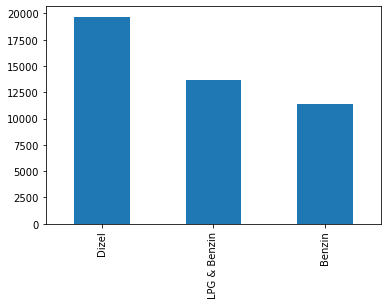

In [4]:
data["Yakıt Tipi"].value_counts().plot.bar()

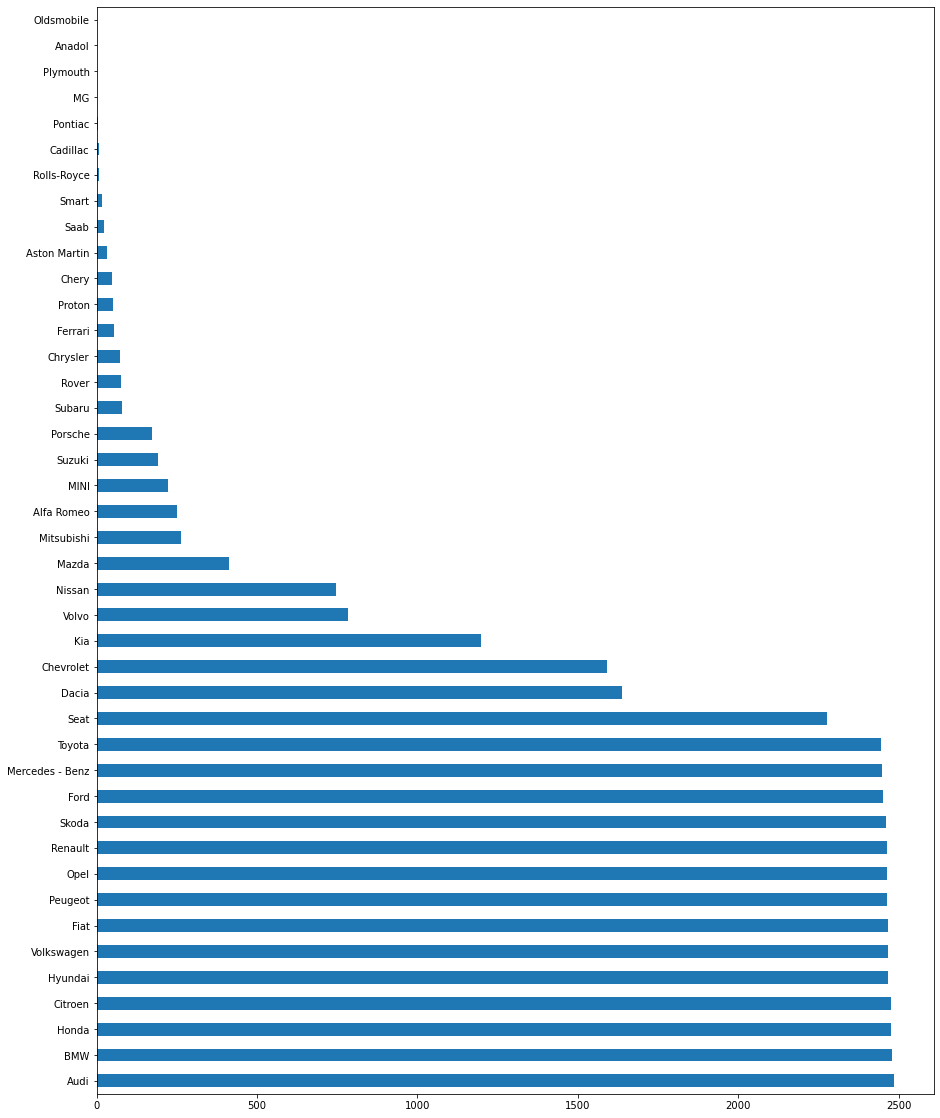

In [5]:
data.Marka.value_counts().plot.barh(figsize=(15,20))

In [6]:
data.Marka.value_counts()

Audi               2484
BMW                2478
Honda              2476
Citroen            2476
Hyundai            2467
Volkswagen         2467
Fiat               2466
Peugeot            2463
Opel               2462
Renault            2462
Skoda              2461
Ford               2452
Mercedes - Benz    2449
Toyota             2444
Seat               2277
Dacia              1638
Chevrolet          1589
Kia                1199
Volvo               785
Nissan              747
Mazda               412
Mitsubishi          263
Alfa Romeo          252
MINI                224
Suzuki              191
Porsche             172
Subaru               79
Rover                77
Chrysler             72
Ferrari              53
Proton               50
Chery                49
Aston Martin         31
Saab                 22
Smart                17
Rolls-Royce           7
Cadillac              6
Pontiac               4
MG                    2
Plymouth              2
Anadol                1
Oldsmobile      

# Aykırı Değer Analizi

In [7]:
marka_columns = data["Marka"].unique()
marka_columns

array(['Alfa Romeo', 'Anadol', 'Aston Martin', 'Audi', 'BMW', 'Cadillac',
       'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Ferrari',
       'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda',
       'Mercedes - Benz', 'MG', 'MINI', 'Mitsubishi', 'Nissan',
       'Oldsmobile', 'Opel', 'Peugeot', 'Plymouth', 'Pontiac', 'Porsche',
       'Proton', 'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Seat',
       'Skoda', 'Smart', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [8]:
def data_manipulation(column:list,group:str,kriter:int,marka:str):
    for col in column:
        arac_sayisi = len(data[data["Marka"] == marka].groupby(group).get_group(col))
        index = data.groupby(group).get_group(col).index
        if arac_sayisi < kriter:
            data.drop(index,axis=0,inplace=True)

Yazılan fonksiyonda farklı markalara ait aynı özellikleri birbirine denk döndürdüğü için marka sütunu için ayrı fonksiyon yazılmıştır.

In [9]:
def data_marka(column:list,group:str,kriter:int):
    for col in column:
        arac_sayisi = len(data.groupby(group).get_group(col))
        index = data.groupby(group).get_group(col).index
        if arac_sayisi < kriter:
            data.drop(index,axis=0,inplace=True)

In [10]:
data_marka(column=marka_columns,group="Marka",kriter=80)

In [11]:
len(data.Marka.unique())

26

In [12]:
silinecekler = [33993,33998,33999,34000,11096,11080,11110,11091,31221,261,258,31374,5251,43949,44501,31262,31256,10388,38835,15019,38129,35085,12393,17385,6841,1382,1830,23779,23927,35212,11913,26794,33929,11574,11904,20587,3473,4330,13605,19535,11311,12167,12448,12499,13621,23113,23976,27725,27763,32520,32527,33627,3905,4540,7385,9176,10952,11367,11430,12347,12993,13236,13354,13445,13547,16000,19952,25629,26478,27824,28384,29845,31078,32137,32353,38920,39030,40345,4579,33955,3284,3317,4247,8220,10480,11163,11234,11608,11662,12062,12844,17592,23109,25924,27016,30718,31432,31571,33342,33474,33928,35336,37096,39281,39437,39636,42007,42193,24604,10583,11901,13962,19383,21661,28546,32759,33464,39274,5282,5545,8325,8615,10131,11238,11268,11568,12610,12659,12669,13392,13447,13538,13803,15714,15715,15716,20629,20718,23252,27004,27281,27808,29490,29792,32323,32900,33943,37421,38203,39282,25463,30005,39040,5290,6956,8368,8750,8860,9422,10039,10070,10662,11718,11867,12404,12784,12843,13082,13149,13154,14651,14657,14715,14903,15012,17152,17286,18667,20576,21748,22155,22421,22473,23199,25470,26673,27454,28015,28737,29422,29820,30343,30549,30980,31039,31061,31104,31598,32135,32638,33228,33353,33921,33949,33973,34653,37540,37860,38891,39723,40749,41559,11332,12201,13801,19684,24381,26541,26576,3722,9143,9507,11418,11561,12198,13456,14035,15836,17860,18090,18626,18841,19344,22708,23442,25511,26789,29583,30192,31391,31620,32695,33138,33396,33912,35021,36237,39388,43035,43392,30929,11898,25646,4292,6944,7397,9640,9835,11013,12092,12118,12279,12809,13338,18760,19411,19478,21603,22342,22453,22466,25366,25547,26307,27368,27834,28699,29781,30042,31553,31794,31846,31912,32138,32160,33935,35255,36595,37117,38164,38488,40744,8786,17647,20445,7656,12294,12689,14323,18529,19004,19660,28724,41164,29415,30826,2243,8397,10839,11231,11519,11540,11855,12618,12650,12823,13661,16465,16850,19800,20143,21445,22216,22284,22416,25472,27237,28795,28903,29448,29895,31024,32897,33330,33974,33976,40737,40883,41128,44193,20257,12764,30128,29597,12061,22126,22282,22387,30520,32815,9838,11547,13359,14494,15332,15636,17528,19828,21664,23437,27118,29914,32315,32674,33987,10046,226,1693,1978,4072,5728,8169,8369,8602,8692,9495,9535,10456,10518,11036,11214,11862,12072,12398,12463,12473,12505,12724,12992,13003,13073,13122,13173,13613,13821,13922,14063,14201,14519,15501,15594,17764,18739,18751,18758,19267,19440,19755,20416,20523,20661,20701,20704,20796,20916,21079,21124,22255,22359,22517,22585,22641,23416,24409,24634,25289,25396,25425,25612,25726,25829,26109,26246,26490,26565,26827,27424,27574,27718,28292,28689,28933,29549,29581,30118,30185,30580,30598,31064,31536,32530,32546,32761,33007,33153,33176,33524,33575,33990,34035,35208,35929,36235,37056,37853,38651,39248,39580,41607,42887,42940,43432,43778,44027,26333,33975,19679,28649,32432,16072,40479,16171,19538,25400,32731,37472,7412,9164,11351,12737,14644,16690,16862,22215,28828,28908,34043,26759,11381,11530,12532,12676,21939,22233,22505,24665,25502,27761,28319,29005,33224,33432,33603,33604,33611,33915,33939,35679,38957,20972,22951,13567,27728,7258,11997,32765,4207,9605,11514,12897,13446,14303,19997,23032,24803,25751,26509,27445,30152,31048,31744,32157,32849,37385,42092,12853,14496,26970,6542,10932,11210,11213,11726,12050,12671,12862,14168,14366,15790,16731,17272,19852,19936,20733,21636,22103,22310,22319,22392,22561,23631,24975,27813,28991,30599,30931,31421,31896,31960,32633,32634,33956,34725,37910,41203,42034,14038,31149,40584,13474,15005,17157,31396,34796,38281,20400,1768,8854,9157,10594,10628,11196,12481,12497,12746,13265,13570,13769,13989,14821,19781,20497,21154,21751,22417,26115,26523,27048,27348,28204,28411,28802,31044,31612,32265,32392,33017,33329,33620,37275,38914,39057,40627,44016,170,200,1670,5102,9082,11511,11702,12293,12359,12477,12545,13128,13169,13409,13536,15048,15493,18283,18684,18691,19427,21745,22227,22446]

In [13]:
data.drop(data.sort_values("Fiyat",ascending=True).head(500).index,axis=0,inplace=True)

In [14]:
data.drop(data[(data["Kilometre"] == 0) & (data["Yıl"] <=2015)].index,axis=0,inplace=True)

In [15]:
data.drop(9967,axis=0,inplace=True)

In [16]:
data[(data["Kilometre"] == 0) & (data["Yıl"] <=2016)]

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen
31349,15500000,Porsche,911,GT3 RS,2016,Benzin,Otomatik,500,3996,0,Belirtilmemiş


In [17]:
data.drop(data.sort_values("Fiyat",ascending=True).head(500).index,axis=0,inplace=True)

In [18]:
data.reindex()

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen
0,68000,Alfa Romeo,156,2.0 TS,1998,LPG & Benzin,Düz,155,1970,400000,12 boyalı
1,423000,Alfa Romeo,Giulietta,1.4 TB MultiAir Super TCT,2017,Benzin,Otomatik,170,1368,63000,Belirtilmemiş
2,280000,Alfa Romeo,MiTo,1.4 T MultiAir Quadrifoglio Verde,2011,LPG & Benzin,Düz,170,1368,189000,Belirtilmemiş
3,185000,Alfa Romeo,166,2.0 TS,1999,LPG & Benzin,Düz,155,1970,280000,Tamamı boyalı
4,280000,Alfa Romeo,MiTo,1.4 T MultiAir Quadrifoglio Verde,2011,LPG & Benzin,Düz,170,1368,182000,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...
44724,308000,Volvo,S60,2.0 D Premium,2011,Dizel,Otomatik,163,1984,278000,"1 değişen, 1 boyalı"
44725,1550000,Volvo,S90,2.0 D5 Inscription,2018,Dizel,Otomatik,226,1801,89000,Belirtilmemiş
44726,542000,Volvo,V40,1.5 T3 Inscription,2018,Benzin,Otomatik,152,1498,39000,2 boyalı
44727,137000,Volvo,S40,1.6,2004,LPG & Benzin,Düz,109,1587,245000,12 boyalı


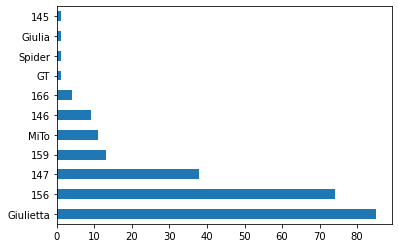

In [19]:
data[data["Marka"] == "Alfa Romeo"].Seri.value_counts().plot.barh()

In [20]:
data[data["Marka"] == "Alfa Romeo"].Seri.value_counts()

Giulietta    85
156          74
147          38
159          13
MiTo         11
146           9
166           4
GT            1
Spider        1
Giulia        1
145           1
Name: Seri, dtype: int64

In [21]:
data_manipulation(column=data[data["Marka"] == "Alfa Romeo"].Seri.unique(),group="Seri",kriter=30,marka="Alfa Romeo")

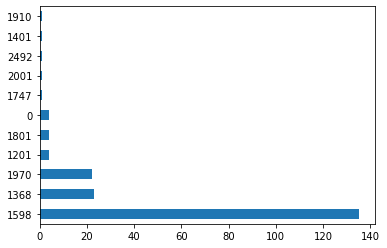

In [22]:
data[data["Marka"] == "Alfa Romeo"]["Motor Hacmi"].value_counts().plot.barh()

In [23]:
data_manipulation(column=data[data["Marka"] == "Alfa Romeo"]["Motor Hacmi"].unique(),group="Motor Hacmi",kriter=8,marka="Alfa Romeo")

In [24]:
data[data["Marka"] == "Audi"].Seri.value_counts()

A3            882
A4            544
A6            334
A5             83
A8             36
RS             26
A1             25
A7             21
S              20
TT             16
80 Serisi       9
100 Serisi      1
Name: Seri, dtype: int64

In [25]:
data_manipulation(column=data[data["Marka"] == "Audi"].Seri.unique(),group="Seri",kriter=30,marka="Audi")

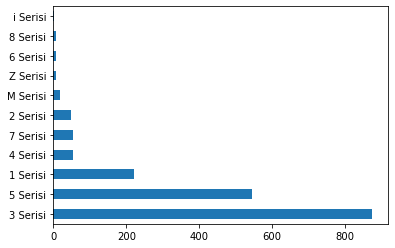

In [26]:
data[data["Marka"] == "BMW"].Seri.value_counts().plot.barh()

In [27]:
data[data["Marka"] == "BMW"].Seri.value_counts()

3 Serisi    875
5 Serisi    545
1 Serisi    221
4 Serisi     54
7 Serisi     54
2 Serisi     49
M Serisi     17
Z Serisi      7
6 Serisi      6
8 Serisi      6
i Serisi      2
Name: Seri, dtype: int64

In [28]:
data_manipulation(column=data[data["Marka"] == "BMW"].Seri.unique(),group="Seri",kriter=48,marka="BMW")

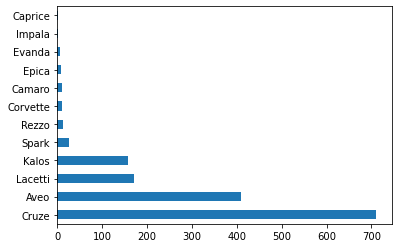

In [29]:
data[data["Marka"] == "Chevrolet"].Seri.value_counts().plot.barh()

In [30]:
data[data["Marka"] == "Chevrolet"].Seri.value_counts()

Cruze       710
Aveo        410
Lacetti     172
Kalos       159
Spark        26
Rezzo        13
Corvette     10
Camaro       10
Epica         8
Evanda        7
Impala        2
Caprice       1
Name: Seri, dtype: int64

In [31]:
data_manipulation(column=data[data["Marka"] == "Chevrolet"].Seri.unique(),group="Seri",kriter=50,marka="Chevrolet")

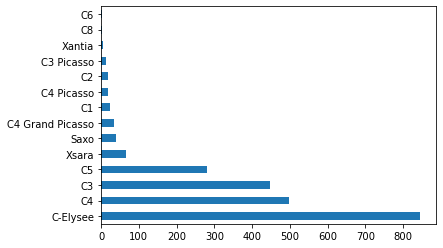

In [32]:
data[data["Marka"] == "Citroen"].Seri.value_counts().plot.barh()

In [33]:
data[data["Marka"] == "Citroen"].Seri.value_counts()

C-Elysee            845
C4                  499
C3                  447
C5                  281
Xsara                65
Saxo                 40
C4 Grand Picasso     34
C1                   24
C4 Picasso           19
C2                   17
C3 Picasso           12
Xantia                4
C8                    3
C6                    2
Name: Seri, dtype: int64

In [34]:
data_manipulation(column=data[data["Marka"] == "Citroen"].Seri.unique(),group="Seri",kriter=50,marka="Citroen")

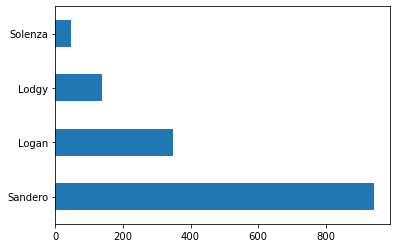

In [35]:
data[data["Marka"] == "Dacia"].Seri.value_counts().plot.barh()

In [36]:
data[data["Marka"] == "Dacia"].Seri.value_counts()

Sandero    943
Logan      349
Lodgy      138
Solenza     46
Name: Seri, dtype: int64

In [37]:
data_manipulation(column=data[data["Marka"] == "Dacia"].Seri.unique(),group="Seri",kriter=50,marka="Dacia")

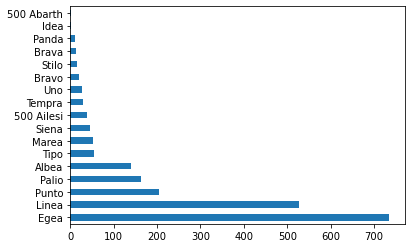

In [38]:
data[data["Marka"] == "Fiat"].Seri.value_counts().plot.barh()

In [39]:
data[data["Marka"] == "Fiat"].Seri.value_counts()

Egea          734
Linea         527
Punto         205
Palio         163
Albea         140
Tipo           56
Marea          52
Siena          46
500 Ailesi     38
Tempra         30
Uno            27
Bravo          21
Stilo          16
Brava          13
Panda          12
Idea            2
500 Abarth      1
Name: Seri, dtype: int64

In [40]:
data_manipulation(column=data[data["Marka"] == "Fiat"].Seri.unique(),group="Seri",kriter=59,marka="Fiat")

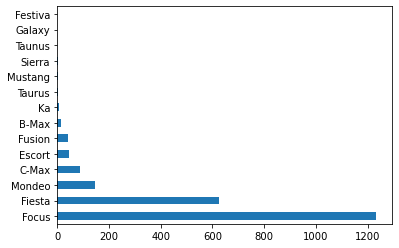

In [41]:
data[data["Marka"] == "Ford"].Seri.value_counts().plot.barh()

In [42]:
data[data["Marka"] == "Ford"].Seri.value_counts()

Focus      1233
Fiesta      627
Mondeo      148
C-Max        87
Escort       44
Fusion       40
B-Max        13
Ka            7
Taurus        4
Mustang       2
Sierra        2
Taunus        1
Galaxy        1
Festiva       1
Name: Seri, dtype: int64

In [43]:
data_manipulation(column=data[data["Marka"] == "Ford"].Seri.unique(),group="Seri",kriter=57,marka="Ford")

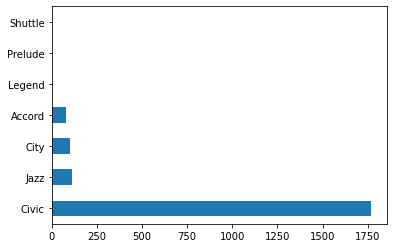

In [44]:
data[data["Marka"] == "Honda"].Seri.value_counts().plot.barh()

In [45]:
data[data["Marka"] == "Honda"].Seri.value_counts()

Civic      1767
Jazz        114
City         98
Accord       78
Legend        1
Prelude       1
Shuttle       1
Name: Seri, dtype: int64

In [46]:
data_manipulation(column=data[data["Marka"] == "Honda"].Seri.unique(),group="Seri",kriter=70,marka="Honda")

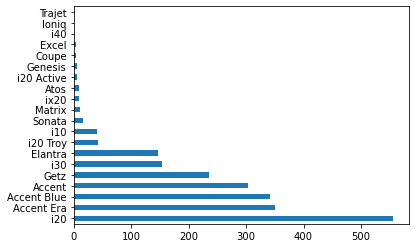

In [47]:
data[data["Marka"] == "Hyundai"].Seri.value_counts().plot.barh()

In [48]:
data[data["Marka"] == "Hyundai"].Seri.value_counts()

i20            555
Accent Era     350
Accent Blue    342
Accent         303
Getz           235
i30            153
Elantra        147
i20 Troy        42
i10             41
Sonata          17
Matrix          11
ix20             9
Atos             9
i20 Active       6
Genesis          6
Coupe            4
Excel            4
i40              1
Ioniq            1
Trajet           1
Name: Seri, dtype: int64

In [49]:
data_manipulation(column=data[data["Marka"] == "Hyundai"].Seri.unique(),group="Seri",kriter=100,marka="Hyundai")

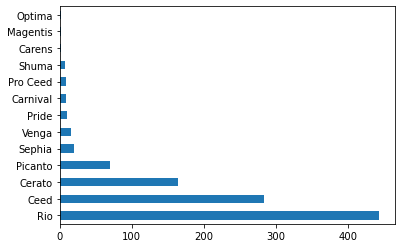

In [50]:
data[data["Marka"] == "Kia"].Seri.value_counts().plot.barh()

In [51]:
data[data["Marka"] == "Kia"].Seri.value_counts()

Rio         443
Ceed        283
Cerato      164
Picanto      70
Sephia       19
Venga        16
Pride        10
Carnival      9
Pro Ceed      8
Shuma         7
Carens        2
Magentis      2
Optima        1
Name: Seri, dtype: int64

In [52]:
data_manipulation(column=data[data["Marka"] == "Kia"].Seri.unique(),group="Seri",kriter=50,marka="Kia")

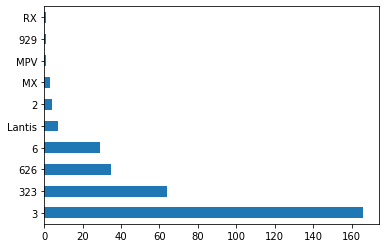

In [53]:
data[data["Marka"] == "Mazda"].Seri.value_counts().plot.barh()

In [54]:
data[data["Marka"] == "Mazda"].Seri.value_counts()

3         166
323        64
626        35
6          29
Lantis      7
2           4
MX          3
MPV         1
929         1
RX          1
Name: Seri, dtype: int64

In [55]:
data_manipulation(column=data[data["Marka"] == "Mazda"].Seri.unique(),group="Seri",kriter=30,marka="Mazda")

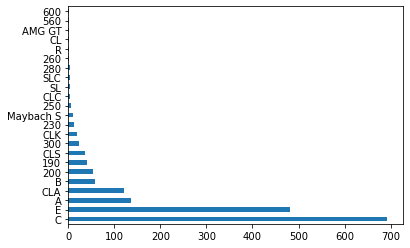

In [56]:
data[data["Marka"] == "Mercedes - Benz"].Seri.value_counts().plot.barh()

In [57]:
data[data["Marka"] == "Mercedes - Benz"].Seri.value_counts()

C            693
E            481
A            135
CLA          120
B             58
200           53
190           40
CLS           37
300           22
CLK           18
230           13
Maybach S      9
250            6
CLC            3
SL             3
SLC            3
280            3
260            2
R              2
CL             2
AMG GT         1
560            1
600            1
Name: Seri, dtype: int64

In [58]:
data_manipulation(column=data[data["Marka"] == "Mercedes - Benz"].Seri.unique(),group="Seri",kriter=30,marka="Mercedes - Benz")

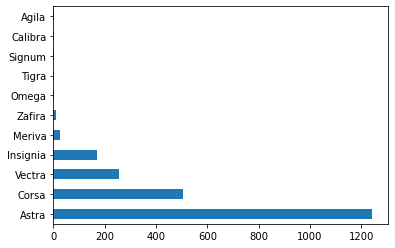

In [59]:
data[data["Marka"] == "Opel"].Seri.value_counts().plot.barh()

In [60]:
data[data["Marka"] == "Opel"].Seri.value_counts()

Astra       1242
Corsa        507
Vectra       254
Insignia     170
Meriva        25
Zafira        11
Omega          3
Tigra          1
Signum         1
Calibra        1
Agila          1
Name: Seri, dtype: int64

In [61]:
data_manipulation(column=data[data["Marka"] == "Opel"].Seri.unique(),group="Seri",kriter=100,marka="Opel")

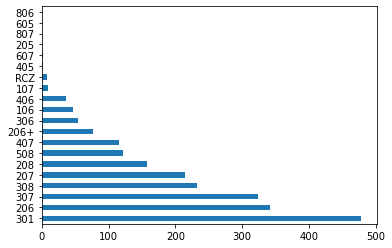

In [62]:
data[data["Marka"] == "Peugeot"].Seri.value_counts().plot.barh()

In [63]:
data[data["Marka"] == "Peugeot"].Seri.value_counts()

301     477
206     341
307     324
308     232
207     214
208     157
508     122
407     115
206+     76
306      54
106      47
406      36
107       9
RCZ       8
405       2
607       2
205       1
807       1
605       1
806       1
Name: Seri, dtype: int64

In [64]:
data_manipulation(column=data[data["Marka"] == "Peugeot"].Seri.unique(),group="Seri",kriter=100,marka="Peugeot")

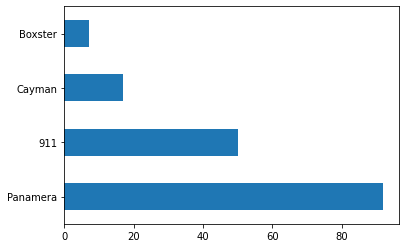

In [65]:
data[data["Marka"] == "Porsche"].Seri.value_counts().plot.barh()

In [66]:
data[data["Marka"] == "Porsche"].Seri.value_counts()

Panamera    92
911         50
Cayman      17
Boxster      7
Name: Seri, dtype: int64

In [67]:
data_manipulation(column=data[data["Marka"] == "Porsche"].Seri.unique(),group="Seri",kriter=10,marka="Porsche")

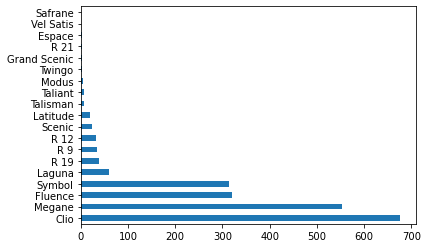

In [68]:
data[data["Marka"] == "Renault"].Seri.value_counts().plot.barh()

In [69]:
data[data["Marka"] == "Renault"].Seri.value_counts()

Clio            675
Megane          554
Fluence         321
Symbol          314
Laguna           60
R 19             39
R 9              34
R 12             32
Scenic           24
Latitude         19
Talisman          7
Taliant           6
Modus             4
Twingo            3
Grand Scenic      3
R 21              3
Espace            2
Vel Satis         1
Safrane           1
Name: Seri, dtype: int64

In [70]:
data_manipulation(column=data[data["Marka"] == "Renault"].Seri.unique(),group="Seri",kriter=57,marka="Renault")

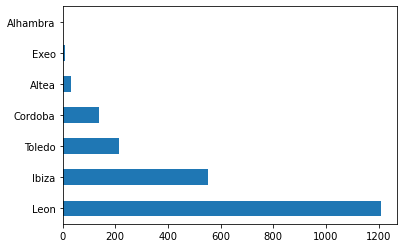

In [71]:
data[data["Marka"] == "Seat"].Seri.value_counts().plot.barh()

In [72]:
data[data["Marka"] == "Seat"].Seri.value_counts()

Leon        1210
Ibiza        552
Toledo       214
Cordoba      140
Altea         32
Exeo          10
Alhambra       3
Name: Seri, dtype: int64

In [73]:

data_manipulation(column=data[data["Marka"] == "Seat"].Seri.unique(),group="Seri",kriter=100,marka="Seat")

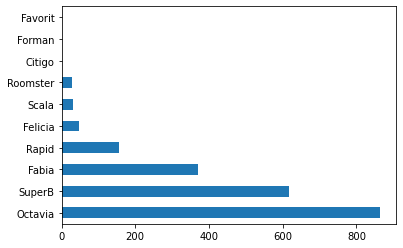

In [74]:
data[data["Marka"] == "Skoda"].Seri.value_counts().plot.barh()

In [75]:
data[data["Marka"] == "Skoda"].Seri.value_counts()

Octavia     865
SuperB      618
Fabia       371
Rapid       157
Felicia      48
Scala        32
Roomster     28
Citigo        2
Forman        1
Favorit       1
Name: Seri, dtype: int64

In [76]:
data_manipulation(column=data[data["Marka"] == "Skoda"].Seri.unique(),group="Seri",kriter=100,marka="Skoda")

In [77]:
data.drop(data[data["Marka"] == "Suzuki"].index,axis=0,inplace=True)

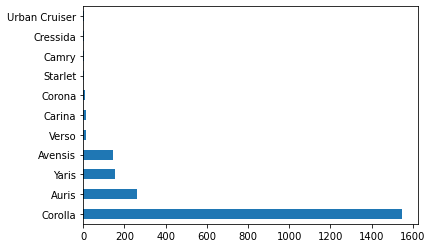

In [78]:
data[data["Marka"] == "Toyota"].Seri.value_counts().plot.barh()

In [79]:
data[data["Marka"] == "Toyota"].Seri.value_counts()

Corolla          1549
Auris             262
Yaris             154
Avensis           146
Verso              14
Carina             14
Corona             10
Starlet             2
Camry               2
Cressida            2
Urban Cruiser       1
Name: Seri, dtype: int64

In [80]:
data_manipulation(column=data[data["Marka"] == "Toyota"].Seri.unique(),group="Seri",kriter=50,marka="Toyota")

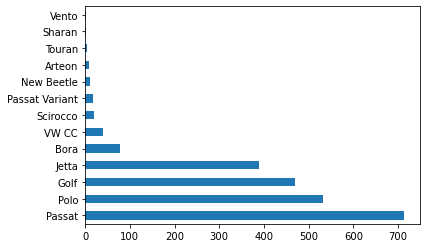

In [81]:
data[data["Marka"] == "Volkswagen"].Seri.value_counts().plot.barh()

In [82]:
data[data["Marka"] == "Volkswagen"].Seri.value_counts()

Passat            713
Polo              533
Golf              469
Jetta             390
Bora               78
VW CC              39
Scirocco           19
Passat Variant     17
New Beetle         10
Arteon              9
Touran              5
Sharan              1
Vento               1
Name: Seri, dtype: int64

In [83]:
data_manipulation(column=data[data["Marka"] == "Volkswagen"].Seri.unique(),group="Seri",kriter=100,marka="Volkswagen")

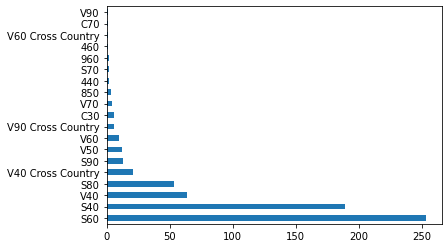

In [84]:
data[data["Marka"] == "Volvo"].Seri.value_counts().plot.barh()

In [85]:
data[data["Marka"] == "Volvo"].Seri.value_counts()

S60                  253
S40                  189
V40                   64
S80                   53
V40 Cross Country     21
S90                   13
V50                   12
V60                   10
V90 Cross Country      6
C30                    6
V70                    4
850                    3
440                    2
S70                    2
960                    2
460                    1
V60 Cross Country      1
C70                    1
V90                    1
Name: Seri, dtype: int64

In [86]:
data_manipulation(column=data[data["Marka"] == "Volvo"].Seri.unique(),group="Seri",kriter=22,marka="Volvo")

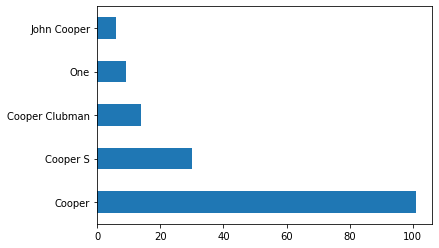

In [87]:
data[data["Marka"] == "MINI"].Seri.value_counts().plot.barh()

In [88]:
data[data["Marka"] == "MINI"].Seri.value_counts()

Cooper            101
Cooper S           30
Cooper Clubman     14
One                 9
John Cooper         6
Name: Seri, dtype: int64

In [89]:
data_manipulation(column=data[data["Marka"] == "MINI"].Seri.unique(),group="Seri",kriter=30,marka="MINI")

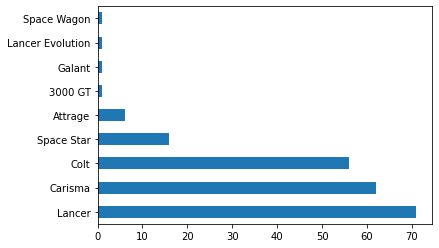

In [90]:
data[data["Marka"] == "Mitsubishi"].Seri.value_counts().plot.barh()

In [91]:
data[data["Marka"] == "Mitsubishi"].Seri.value_counts()

Lancer              71
Carisma             62
Colt                56
Space Star          16
Attrage              6
3000 GT              1
Galant               1
Lancer Evolution     1
Space Wagon          1
Name: Seri, dtype: int64

In [92]:
data_manipulation(column=data[data["Marka"] == "Mitsubishi"].Seri.unique(),group="Seri",kriter=20,marka="Mitsubishi")

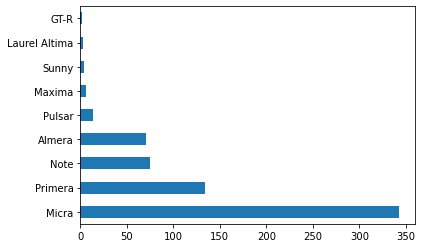

In [93]:
data[data["Marka"] == "Nissan"].Seri.value_counts().plot.barh()

In [94]:
data[data["Marka"] == "Nissan"].Seri.value_counts()

Micra            343
Primera          134
Note              75
Almera            71
Pulsar            14
Maxima             6
Sunny              4
Laurel Altima      3
GT-R               2
Name: Seri, dtype: int64

In [95]:
data_manipulation(column=data[data["Marka"] == "Nissan"].Seri.unique(),group="Seri",kriter=20,marka="Nissan")

In [96]:
data[(data["Motor Gücü"] == 0) | (data["Motor Hacmi"] == 0)].index

Int64Index([  518,  2610,  3293,  7220,  8476,  9905, 10298, 10332, 10426,
            10506, 10758, 10766, 10877, 17372, 20213, 22402, 23527, 24647,
            24720, 24999, 28595, 29058, 29081, 29795, 30212, 30237, 30441,
            30606, 30690, 30814, 33207, 39071, 39120, 39134, 39235, 39255,
            39453, 39599, 39680, 39780, 39787, 39941, 40075, 40205, 40316,
            40328, 40435, 40440, 40465, 40618, 40670, 40720, 40732, 40736,
            40768, 40793, 40888, 40991, 41116, 41399, 42160, 42222, 42661,
            43733],
           dtype='int64')

In [97]:
data.drop(data[(data["Motor Gücü"] == 0) | (data["Motor Hacmi"] == 0)].index,axis=0,inplace=True)

In [98]:
data

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen
0,68000,Alfa Romeo,156,2.0 TS,1998,LPG & Benzin,Düz,155,1970,400000,12 boyalı
1,423000,Alfa Romeo,Giulietta,1.4 TB MultiAir Super TCT,2017,Benzin,Otomatik,170,1368,63000,Belirtilmemiş
5,72500,Alfa Romeo,156,2.0 TS,1998,LPG & Benzin,Düz,155,1970,289766,6 boyalı
6,89000,Alfa Romeo,156,1.6 TS Progression,2004,LPG & Benzin,Düz,120,1598,298000,"1 değişen, 12 boyalı"
8,160000,Alfa Romeo,156,1.6 TS Distinctive,2005,LPG & Benzin,Düz,120,1598,175000,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...
44721,377500,Volvo,S60,1.6 D Advance,2015,Dizel,Yarı Otomatik,115,1560,152000,Belirtilmemiş
44722,97000,Volvo,S40,1.6,2002,LPG & Benzin,Düz,109,1587,270000,Belirtilmemiş
44724,308000,Volvo,S60,2.0 D Premium,2011,Dizel,Otomatik,163,1984,278000,"1 değişen, 1 boyalı"
44726,542000,Volvo,V40,1.5 T3 Inscription,2018,Benzin,Otomatik,152,1498,39000,2 boyalı


# Boya-Değişen Sütunu İşlemleri

In [103]:
data[["Boya","Değişen"]] = "-"

KeyError: "None of [Index(['Boya', 'Değişen'], dtype='object')] are in the [columns]"

In [104]:
data.loc[data["Boya-değişen"] == "Tamamı boyalı","Boya-değişen"] = "Tamamı boya"
data["Boya-değişen"].unique()

array(['12 boyalı', 'Belirtilmemiş', '6 boyalı', '1 değişen, 12 boyalı',
       '9 boyalı', 'Tamamı boya', '2 değişen, 10 boyalı', '6 değişen',
       '2 değişen, 3 boyalı', '4 değişen, 5 boyalı', '5 boyalı',
       '2 değişen', 'Tamamı orjinal', '2 değişen, 4 boyalı', '1 boyalı',
       '1 değişen, 3 boyalı', '1 değişen, 2 boyalı', '3 boyalı',
       '1 değişen, 11 boyalı', '1 değişen, 10 boyalı', '2 boyalı',
       '1 değişen', '1 değişen, 5 boyalı', '1 değişen, 6 boyalı',
       '2 değişen, 7 boyalı', '2 değişen, 11 boyalı', '4 boyalı',
       '1 değişen, 7 boyalı', '2 değişen, 8 boyalı', '8 boyalı',
       '3 değişen, 6 boyalı', '1 değişen, 9 boyalı',
       '1 değişen, 4 boyalı', '4 değişen, 9 boyalı',
       '1 değişen, 8 boyalı', '4 değişen, 8 boyalı', '7 boyalı',
       '2 değişen, 2 boyalı', '3 değişen, 10 boyalı',
       '1 değişen, 1 boyalı', '4 değişen, 1 boyalı', '3 değişen',
       '2 değişen, 6 boyalı', '11 boyalı', '2 değişen, 5 boyalı',
       '4 değişen', '3 değişen, 

In [105]:
data

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen
0,68000,Alfa Romeo,156,2.0 TS,1998,LPG & Benzin,Düz,155,1970,400000,12 boyalı
1,423000,Alfa Romeo,Giulietta,1.4 TB MultiAir Super TCT,2017,Benzin,Otomatik,170,1368,63000,Belirtilmemiş
5,72500,Alfa Romeo,156,2.0 TS,1998,LPG & Benzin,Düz,155,1970,289766,6 boyalı
6,89000,Alfa Romeo,156,1.6 TS Progression,2004,LPG & Benzin,Düz,120,1598,298000,"1 değişen, 12 boyalı"
8,160000,Alfa Romeo,156,1.6 TS Distinctive,2005,LPG & Benzin,Düz,120,1598,175000,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...
44721,377500,Volvo,S60,1.6 D Advance,2015,Dizel,Yarı Otomatik,115,1560,152000,Belirtilmemiş
44722,97000,Volvo,S40,1.6,2002,LPG & Benzin,Düz,109,1587,270000,Belirtilmemiş
44724,308000,Volvo,S60,2.0 D Premium,2011,Dizel,Otomatik,163,1984,278000,"1 değişen, 1 boyalı"
44726,542000,Volvo,V40,1.5 T3 Inscription,2018,Benzin,Otomatik,152,1498,39000,2 boyalı


In [106]:
data.loc[data["Boya-değişen"].str.contains(","),"Boya-değişen"] = data["Boya-değişen"].str.replace(" değişen","-").str.replace(" boyalı","")

In [107]:
data.loc[data["Boya-değişen"].str.contains(","),"Boya-değişen"] = data["Boya-değişen"].str.replace(", ","")

In [108]:
data

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen
0,68000,Alfa Romeo,156,2.0 TS,1998,LPG & Benzin,Düz,155,1970,400000,12 boyalı
1,423000,Alfa Romeo,Giulietta,1.4 TB MultiAir Super TCT,2017,Benzin,Otomatik,170,1368,63000,Belirtilmemiş
5,72500,Alfa Romeo,156,2.0 TS,1998,LPG & Benzin,Düz,155,1970,289766,6 boyalı
6,89000,Alfa Romeo,156,1.6 TS Progression,2004,LPG & Benzin,Düz,120,1598,298000,1-12
8,160000,Alfa Romeo,156,1.6 TS Distinctive,2005,LPG & Benzin,Düz,120,1598,175000,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...
44721,377500,Volvo,S60,1.6 D Advance,2015,Dizel,Yarı Otomatik,115,1560,152000,Belirtilmemiş
44722,97000,Volvo,S40,1.6,2002,LPG & Benzin,Düz,109,1587,270000,Belirtilmemiş
44724,308000,Volvo,S60,2.0 D Premium,2011,Dizel,Otomatik,163,1984,278000,1-1
44726,542000,Volvo,V40,1.5 T3 Inscription,2018,Benzin,Otomatik,152,1498,39000,2 boyalı


In [109]:
data.loc[data["Boya-değişen"] == "Tamamı boya",["Boya","Değişen"]] = [13,0]
data.loc[data["Boya-değişen"] == "Tamamı değişmiş",["Boya","Değişen"]] = [0,13]

KeyError: "None of [Index(['Boya', 'Değişen'], dtype='object')] are in the [columns]"

In [110]:
data.loc[data["Boya-değişen"].str.contains("-"),"Boya"] = data["Boya-değişen"].str.split("-").str.get(0)
data.loc[data["Boya-değişen"].str.contains("-"),"Değişen"] = data["Boya-değişen"].str.split("-").str.get(1)

In [188]:
data.loc[data["Boya-değişen"].str.contains("boyalı"), "Boya"] = data["Boya-değişen"].str.replace(" boyalı","")
data.loc[data["Boya-değişen"].str.contains("boyalı"), "Değişen"] = 0

In [189]:
data.loc[data["Boya-değişen"].str.contains("değişen"), "Değişen"] = data["Boya-değişen"].str.replace(" değişen","")
data.loc[data["Boya-değişen"].str.contains("değişen"), "Boya"] = 0

In [190]:
data.loc[data["Boya-değişen"] == "Belirtilmemiş",["Boya","Değişen"]] = [0,0]

In [191]:
data.loc[data["Boya-değişen"] == "Tamamı orjinal",["Boya","Değişen"]] = [0,0]

In [192]:
def convert_value_Type(obj):
    return int(obj)

In [193]:
data[data["Boya"] == "-"]

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen,Boya,Değişen


In [194]:
data["Boya"] = data["Boya"].apply(convert_value_Type)
data["Değişen"] = data["Değişen"].apply(convert_value_Type)

In [195]:
data.drop("Boya-değişen",axis=1,inplace=True)

In [199]:
data.loc[data["Boya"] == 12 , "Boya"] = 13

In [200]:
data.loc[data["Değişen"] == 12 , "Değişen"] = 13

In [201]:
data

,Fiyat,Marka,Seri,Model,Yıl,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen,Yakıt_Benzin,Yakıt_Dizel,Yakıt_LPG & Benzin,Vites_Düz,Vites_Otomatik,Vites_Yarı Otomatik
0,68000,Alfa Romeo,156,2.0 TS,1998,155,1970,400000,13,0,0,0,1,1,0,0
1,423000,Alfa Romeo,Giulietta,1.4 TB MultiAir Super TCT,2017,170,1368,63000,0,0,1,0,0,0,1,0
5,72500,Alfa Romeo,156,2.0 TS,1998,155,1970,289766,6,0,0,0,1,1,0,0
6,89000,Alfa Romeo,156,1.6 TS Progression,2004,120,1598,298000,1,13,0,0,1,1,0,0
8,160000,Alfa Romeo,156,1.6 TS Distinctive,2005,120,1598,175000,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44721,377500,Volvo,S60,1.6 D Advance,2015,115,1560,152000,0,0,0,1,0,0,0,1
44722,97000,Volvo,S40,1.6,2002,109,1587,270000,0,0,0,0,1,1,0,0
44724,308000,Volvo,S60,2.0 D Premium,2011,163,1984,278000,1,1,0,1,0,0,1,0
44726,542000,Volvo,V40,1.5 T3 Inscription,2018,152,1498,39000,2,0,1,0,0,0,1,0


# Yakıt Tipi - Vites Tipi Sütunları One-Hot Encoding

In [197]:
data = pnd.get_dummies(data,columns=["Yakıt Tipi","Vites Tipi"],prefix=["Yakıt","Vites"])

In [327]:
data.to_excel('Arabalar.xlsx')

# Dataseti Markalara Göre Ayırma

In [333]:
markalar = data["Marka"].unique()

In [340]:
markalar

array(['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia',
       'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda',
       'Mercedes - Benz', 'MINI', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Porsche', 'Renault', 'Seat', 'Skoda', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

In [341]:
datasets = list()

In [342]:
def markalara_Ayir():
    for marka in markalar:
        dset = data[data["Marka"] == marka]
        dset = pnd.DataFrame(dset)
        datasets.append(dset)

In [343]:
markalara_Ayir()

# Marka Bazlı One-hot Encoding

In [344]:
def encoding():
    encoded_list = list()
    index = 0
    for marka in datasets:
        marka.drop("Marka",axis=1,inplace=True)
        data = pnd.get_dummies(data=marka,columns=["Seri","Model"],prefix=["Seri","Model"])
        data.to_excel(f'{markalar[index]}.xlsx')
        index += 1

In [345]:
encoding()

# One-hot Encoding Dönüşümü

In [51]:
def get_column_names(col_name:str):
    columns = ds2.columns
    liste = []
    for col in columns:
        if col_name in col:
            liste.append(col)
    return liste

In [74]:
def converting(column:str,col_name:str):
    liste = get_column_names(column)
    predict_list = list(nmp.zeros(len(liste),dtype=int))
    for item in.endswith(col_name):
             liste:
        if itemindex = liste.index(item)
            predict_list[index] = 1
    return predict_list

In [111]:
tahmin_verisi = [2017,190,1995,179000,0,0]

In [112]:
tahmin_verisi.extend(converting("Yakıt","Dizel"))

In [113]:
tahmin_verisi

[2017, 190, 1995, 179000, 0, 0, 0, 1, 0]

In [114]:
tahmin_verisi.extend(converting("Vites","Otomatik"))

In [115]:
tahmin_verisi

[2017, 190, 1995, 179000, 0, 0, 0, 1, 0, 0, 1, 1]

In [116]:
tahmin_verisi.extend(converting("Seri","1 Serisi"))

In [117]:
tahmin_verisi

[2017, 190, 1995, 179000, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0]

In [118]:
tahmin_verisi.extend(converting("Model","Model_745i"))

In [119]:
len(tahmin_verisi)

229

# Seri Sütunu One-Hot

# Yakıt Tipi One-Hot

In [70]:
seri_list = get_column_names("Yakıt")

In [71]:
seri_list

['Yakıt_Benzin', 'Yakıt_Dizel', 'Yakıt_LPG & Benzin']

In [37]:
ohe_Seri = 
ohe_Seri

[0, 0, 0, 0]

In [299]:
ds2.Fiyat.sort_values(ascending=False).head(1).index

Int64Index([33], dtype='int64')

String 

In [44]:
ohe_Seri

[1, 0, 1, 0]

In [301]:
ds2.to_excel("BMW_OneHot.xlsx")

In [304]:
ds2.min()

Fiyat              41999
Yıl                 1984
Motor Gücü            90
Motor Hacmi         1200
Kilometre              0
                   ...  
Model_740i Long        0
Model_745i             0
Model_745i Long        0
Model_750i Long        0
Model_760i Long        0
Length: 230, dtype: int64

In [21]:
len(ds2["Motor Hacmi"].unique())

31

# Train-Test Split

In [294]:
x = ds2.drop("Fiyat",axis=1)
y = ds2["Fiyat"]

In [295]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=40)

# Linear Regression

In [296]:
model= LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [297]:
mean_absolute_error(pred,y_test)

3416964623.82456

In [18]:
model.predict([[2015,1,1598,175000,3,5,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([196007.51039563])

# Cross Validation

In [234]:
yeni = ds2.loc[y_test.head(50).index][["Fiyat","Yıl","Kilometre","Motor Gücü","Motor Hacmi","Boya","Değişen"]]
yeni["Tahmin"] = pred[0:50]
yeni["Fark"] = (yeni.Tahmin - yeni.Fiyat).abs()
yeni

,Fiyat,Yıl,Kilometre,Motor Gücü,Motor Hacmi,Boya,Değişen,Tahmin,Fark
1222,150000,2008,275000,102,1595,6,0,170443.220030,20443.220030
1145,347000,2013,200000,177,1968,0,0,411616.380796,64616.380796
787,321900,2017,134000,116,1598,0,0,346124.968534,24224.968534
361,243500,2011,151000,120,1798,3,0,203433.387502,40066.612498
86,298500,2013,229000,177,1968,1,2,296407.275186,2092.724814
323,490000,2020,24098,150,1498,0,0,491721.142751,1721.142751
110,175000,2006,255000,233,2967,0,0,319077.196277,144077.196277
1137,242000,2015,149000,110,1598,1,2,275946.594327,33946.594327
213,212500,2012,178000,105,1598,6,0,211096.562593,1403.437407
42,155000,2007,101000,102,1595,0,0,176785.242498,21785.242498


In [29]:
bst = xgb.XGBRegressor()

In [269]:
ds3 = ds2
ds3 = ds3.astype(str)
ds3['Kolonlar'] = ds3.apply(",".join,axis=1)
ds3 = pnd.DataFrame(data = ds3.Kolonlar)
ds3

,Kolonlar
0,"530000,2017,150,1395,121000,0,0,1,0,0,0,0,1,0,..."
1,"365000,2013,177,1968,159000,1,7,0,1,0,0,1,0,0,..."
2,"99950,1998,101,1595,284000,0,0,0,0,1,1,0,0,0,1..."
3,"255900,2005,335,4163,179000,1,4,1,0,0,0,1,0,0,..."
4,"187500,2011,125,1390,168000,0,0,1,0,0,0,0,1,1,..."
...,...
1355,"119000,2005,115,1595,227000,3,0,0,0,1,1,0,0,1,..."
1356,"252000,2013,105,1598,188000,1,0,0,1,0,0,0,1,1,..."
1357,"135000,2006,140,1968,360000,9,0,0,1,0,0,1,0,0,..."
1358,"145000,2008,102,1595,211000,0,0,0,0,1,0,1,0,1,..."


In [270]:
ds3.to_excel("Audi_Kolonlar.xlsx")

In [30]:
xgb_grid = {
            'colsample_bytree':[0.4,0.5,0.6,1], 
            'n_estimators':[100,200,300,700], 
            'max_depth':[2,3,4,5], 
            'learning_rate':[0.1,0.01,0.2,0.5]
           }

In [31]:
bst_cv = GridSearchCV(bst,
                     param_grid=xgb_grid,
                     cv = 4,
                     n_jobs = -1,
                     verbose = 2)

In [235]:
bst_cv.fit(x_train,y_train)
pred = bst_cv.predict(x_test)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits


In [33]:
bst_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 700}

In [236]:
xgb_tuned = xgb.XGBRegressor(colsample_bytree = 0.6,learning_rate = 0.01,max_depth = 4,n_estimators = 700)

In [237]:
xgb_tuned.fit(x_train,y_train)
pred = xgb_tuned.predict(x_test)

In [238]:
mean_absolute_error(y_test,pred)

37059.73170955882

In [281]:
ds.loc[[693,1001,408,800,290,1331,272]]

,Fiyat,Seri,Model,Yıl,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen,Yakıt_Benzin,Yakıt_Dizel,Yakıt_LPG & Benzin,Vites_Düz,Vites_Otomatik,Vites_Yarı Otomatik
693,89000,A4,A4 Sedan 1.6,2000,102,1595,445000,0,0,0,0,1,1,0,0
1001,143900,A3,A3 Sportback 1.4 TFSI Ambition,2008,125,1390,172500,0,2,1,0,0,1,0,0
408,599000,A4,A4 Sedan 2.0 TDI Quattro Design,2016,190,1968,112376,0,0,0,1,0,0,0,1
800,790000,A5,A5 Coupe 2.0 TDI,2018,177,1968,118500,4,0,0,1,0,0,1,0
290,345000,A4,A4 Sedan 2.0 TDI,2014,150,1968,178000,0,0,0,1,0,0,1,0
1331,725000,A5,A5 Coupe 2.0 TDI Design,2018,190,1968,122782,0,0,0,1,0,0,0,1
272,346750,A3,A3 Sedan 1.6 TDI Ambition,2015,110,1598,99000,0,0,0,1,0,0,0,1


In [280]:
xgb_tuned.predict(nmp.array([2015,110,1598,160000,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1,-1))   

array([288859.38], dtype=float32)

In [275]:
model.predict([[2014,110,1598,175000,0,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 151 is different from 168)